# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020","ALQ110"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [42]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,ALQ110
3,132.0,56,2,3,5.0,42.4,2,1.0
4,100.0,42,2,4,4.0,20.3,2,1.0
5,116.0,72,2,1,2.0,28.6,2,2.0
13,124.0,67,2,2,5.0,43.7,2,1.0
19,136.0,54,2,5,4.0,26.3,2,2.0


In [43]:
# first i check for the correlation between them
# da[['BMXBMI','RIDAGEYR']].corr()
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.131
Time:                        10:45:27   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

my model tells me that the age is not a significant factor on BMI for a person 

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

no their are no relationship between them the R square = 0 which means their isn't any

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

if we use our equation it will be ==>  20 * .0091 = 0.182 which isn't much

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

if we consider R square it would be .001 and if we take the adjusted one it will be Zero percent

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [44]:
# enter your code here
"""
    1	Mexican American		
    2	Other Hispanic	
    3	Non-Hispanic White	
    4	Non-Hispanic Black	
    5	Other Race - Including Multi-Racial
"""
# da.RIDRETH1.value_counts()
da['RIDRETH1x'] = da.RIDRETH1.replace(
    {1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', 4: 'Non-Hispanic Black', 5: 'Other Race'})

da['RIAGENDRx'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
# da.RIDRETH1x.value_counts()

In [45]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR +RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           5.55e-27
Time:                        10:45:27   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          29.2813      0.969     30.211      0.000      27.380      31.182
RIDRETH1x[T.Non-Hispanic Black]    -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non-Hispanic White]    -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Other Hispanic]        -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other Race]            -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIDAGEYR                            0.0058      0.010      0.560      0.576      -0.015       0.026
RIAGENDR                            1.2017      0.407      2.949      0.003       0.402       2.001
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

it decreased a little from 0.0091 to 0.0065  it become more   not significant 

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

  and the standard error decreased also means that our calculation becomes more accurate  .006 to 0.005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

5.4 % of our data variability  can be explained by this model 

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

this means that all other coefficient are held constant so we will use the coefficient of age 
it will be calculated like this ==> 0.0065 * 10 which is the difference at age 
so, the answer will be 0.065 of BMI between them 

we can calculate it by equation in these 3 steps 
expected difference 
1- for 40 years old BMI = 29.1908	- 0.4499	+ (0.0065 * 40) = 29.0009
2- for 30 years old BMI = 29.1908	- 0.4499	+ (0.0065 * 30) = 28.9359
3- the difference is    = 29.0009   - 28.9359   =  0.065

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [46]:
# i will add the gender to calculate the difference between man and woman in the last question
model = sm.OLS.from_formula(
    "BMXBMI ~ RIDAGEYR + RIAGENDRx +RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           5.55e-27
Time:                        10:45:27   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.6846      0.682     46.453      0.000      30.347      33.023
RIAGENDRx[T.Male]                  -1.2017      0.407     -2.949      0.003      -2.001      -0.402
RIDRETH1x[T.Non-Hispanic Black]    -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non-Hispanic White]    -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Other Hispanic]        -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other Race]            -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIDAGEYR                            0.0058      0.010      0.560      0.576      -0.015       0.026
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

because the age are the same and all other variables are held constant any way so we can get the 
difference from coefficient alone intercept in the above is for Mexican American woman if all other so 
the only difference could be age but the in this question it's even the same so, the difference will be the coefficient of the Non-Hispanic Black = -0.4499 


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [47]:
# enter your code here
da25s = da.sample(int(len(da)*.25))
# da25s.head()
model = sm.OLS.from_formula(
    "BMXBMI ~ RIDAGEYR + RIAGENDRx +RIDRETH1x", data=da25s)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     8.357
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.70e-08
Time:                        10:45:27   Log-Likelihood:                -1243.7
No. Observations:                 368   AIC:                             2501.
Df Residuals:                     361   BIC:                             2529.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          30.9826      1.431     21.656      0.000      28.169      33.796
RIAGENDRx[T.Male]                  -1.4771      0.836     -1.767      0.078      -3.121       0.167
RIDRETH1x[T.Non-Hispanic Black]    -1.3343      1.212     -1.101      0.272      -3.718       1.049
RIDRETH1x[T.Non-Hispanic White]    -1.3070      1.163     -1.124      0.262      -3.594       0.980
RIDRETH1x[T.Other Hispanic]         0.3469      1.336      0.260      0.795      -2.280       2.974
RIDRETH1x[T.Other Race]            -6.3291      1.200     -5.274      0.000      -8.689      -3.969
RIDAGEYR                            0.0265      0.021      1.264      0.207      -0.015       0.068
==============================================================================
Omnibus:                       92.001   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.033
Skew:                           1.238   Prob(JB):                     1.23e-47
Kurtosis:                       5.821   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

it semis that the coefficient has decreased by almost 1 unit
and the standard error decreased by half 

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

In [48]:
model = sm.OLS.from_formula(
    "BMXBMI ~ RIDAGEYR + RIAGENDRx +RIDRETH1x", data=da)
result = model.fit()

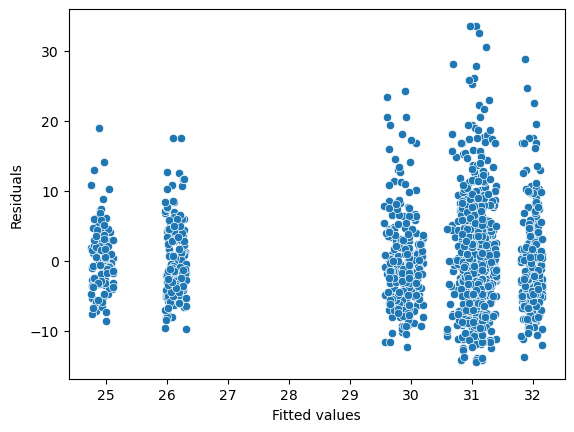

In [49]:
pp = sns.scatterplot(x=result.fittedvalues, y=result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

It appears that we have a modestly increasing mean/variance
relationship.  That is, the scatter around the mean BMI is
greater when the mean BMI itself is greater.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'BPXSY1', 'ALQ110' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'BPXSY1', 'ALQ110' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


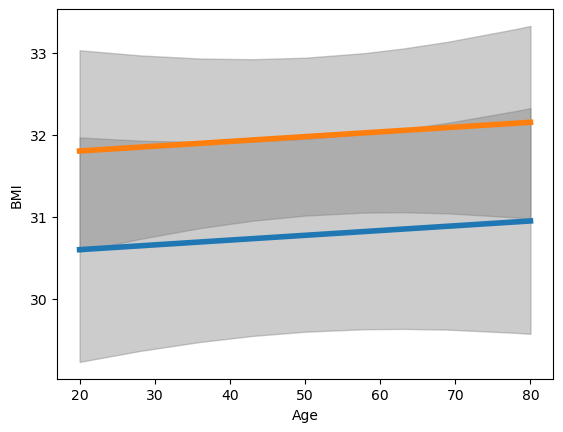

In [50]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Male", "RIAGENDR": 1, "RIDRETH1x": 'Mexican American',
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                                values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")


values = {"RIAGENDRx": "Female", "RIAGENDR": 2, "RIDRETH1x": 'Mexican American',
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                                values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

if i understand the question right 
the line would be from age 30 on x axises and between 30 and 30.23 BMI this would be the longest line 

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

they overlap through the graph because we specified certain values for smoking we choose smoking ones 
and education lt9 least than 9  years of education  

c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'ALQ110' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:187: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  fexog.loc[:, ky] = summaries[ky](exog.loc[:, ky])
c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'ALQ110' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
c:\Users\engsa\mambaforge\envs\ds\Lib\site-packages\statsmodels\sandbox\predict_functional.py:187: FutureWarning:

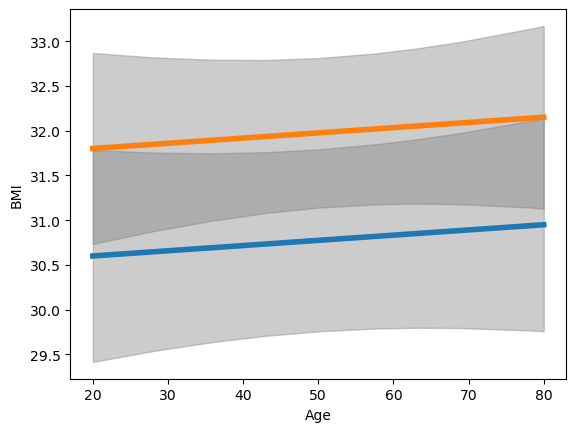

In [51]:
from statsmodels.sandbox.predict_functional import predict_functional
import statistics
# here we give the mean and mode for every other variable as we can see the cb changed
summaries = {'BPXSY1': np.mean, 'SMQ020': np.mean, 'DMDEDUC2': statistics.mode,
             'RIDRETH1': statistics.mode, 'RIAGENDR': statistics.mode}

values = {"RIAGENDRx": "Male", "RIDRETH1x": 'Mexican American'}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                                values=values, summaries=summaries, ci_method="simultaneous", alpha=0.1)

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

values = {"RIAGENDRx": "Female", "RIDRETH1x": 'Mexican American'}
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                                values=values, summaries=summaries, ci_method="simultaneous", alpha=0.1)

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

so we could say if we choose the mean and the mode in every other variable we could see that their is a difference from age 35 to 60 roughly their is a difference between Males and Females during this ages  

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [52]:
# filter the data for females mexican american
df = da.loc[(da["RIAGENDRx"] == "Female") & (
    da["RIDRETH1x"] == 'Mexican American')]

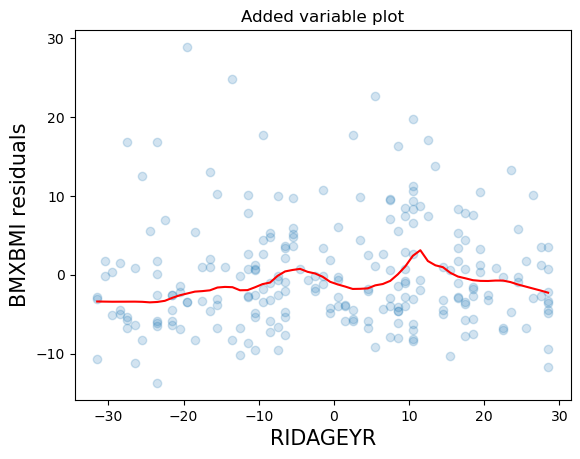

In [53]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot

model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR", data=df)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

the relationships between the age and BMI is not linear as we think,
it has some waves to it 
we could say that every 10 years has it's own relationship 
from 20 to 30 the the BMI has negative relationship
from 30 to 40 has positive and increased  
from 40 to 45 some decrease and after that some stability for relationship with downward trend to it 

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [54]:
# enter your code here 1 : y , 2 :n , 9:np.nan,7: np.nan
da['ALQ110x'] = da.ALQ110.replace({2: 0, 9: np.nan, 7: np.nan}).dropna()
da['ALQ110x'].value_counts()

0.0    801
1.0    667
Name: ALQ110x, dtype: int64

In [55]:
c = pd.crosstab(da.RIAGENDRx, da.ALQ110x).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

ALQ110x,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549228,0.450772,0.820738
Male,0.537037,0.462963,0.862069


In [59]:
c.odds.Male / c.odds.Female

1.0503581185852469

In [60]:
c["logodds"] = np.log(c.odds)
c

ALQ110x,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,0.820738,-0.197551
Male,0.537037,0.462963,0.862069,-0.148420


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

no

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

no  only 1 (point) more males drink compared to females. men have 1.05x greater odds of drinking (e.g. 21 men drink for every 20 women that drink).

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [61]:
# enter your code here
model = sm.GLM.from_formula(
    "ALQ110x ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ALQ110x   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Sun, 18 Jun 2023   Deviance:                       2022.6
Time:                        10:53:24   Pearson chi2:                 1.47e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0001244
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1976      0.062     -3.164      0.002      -0.320      -0.075
RIAGENDRx[T.Male]     0.0491      0.115      0.427      0.669      -0.176       0.274
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

yes their are a statistical significant difference the male are more drinkers than women 
or we could say that the females are less than males  

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [62]:
c.logodds.Male - c.logodds.Female

0.0491311713391602

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [57]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [58]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?